<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 7. Conceptos avanzados</font></h1>

<h1><font color="#113D68" size=4>1. Prácticas en Keras</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

<a id="section0"></a>
# <font color="#004D7F" size=5> Contexto</font>

A lo largo de esta práctica vamos a tratar de resumir todos los conceptos vistos hasta ahora en prácticas, pero esta vez utilizando Keras:
* Definición de un grafo
* Entrenamiento de una red
* Capas de la red
* Carga de grandes bases de datos
* Data augmentation (para reducir el overffiting)

Para ver todo esto, vamos a trabajar con dos bases de datos (dos proyectos diferentes):
* MNIST: la base de datos de números nos servirá para definir los conceptos básicos. Tendremos que intentar predecir el número.
* VGG 102 Category Flowers: la base de datos utilizada en las prácticas anteriores, que consiste en un problema de clasificación de imágenes y con el que veremos redes con capas más complejas, como cargar grandes bases de datos y el data augmentation.

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [1. Introducción](#section1)
* [2. Conceptos básicos](#section2)
    * [2.1. MNIST](#section2.1)
    * [2.2. Grafo](#section2.2)
    * [2.3. Entrenamiento](#section2.3)
    * [2.4. Predicción y validación](#section2.4)
* [3. Conceptos avanzados](#section3)
    * [3.1. VGG 102 Category Flowers](#section3.1)
    * [3.2. Red Convolucional](#section3.2)
        * [summary](#section3.2.1)
        * [get_config](#section3.2.2)
    * [3.3. Entrenamiento y validación](#section3.3)
    * [3.4. Data Augmentation](#section3.4)


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import keras

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
SEED = 1000
np.random.seed(SEED)
tf.random.set_seed(SEED)

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Introducción</font>

En esta práctica vamos a ver Keras, una de las APIs más importantes de Deep Learning escrita en Pyhton y que ofrece una capa de abstracción sobre librerías como TensorFlow o Theano.

El objetivo de Keras es simplificar lo máximo posible la definición de los grafos, haciendo más fácil la tarea al usuario, pero sin perder la modularidad. Otro de sus puntos fuertes es la facilidad para crear nuevos módulos propios que extienden su funcionalidad. Y lo más importante, es Python. Por poneros un ejemplo, en Keras el entrenamiento se realiza mediante la función `fit`.

En la siguiente gráfica vemos la importancia tanto de TensorFlow como de Keras en el panorama actual. [+ info](https://www.experfy.com/blog/deep-learning-framework-power-scores-2018)

<img src="https://pbs.twimg.com/media/DXy_uc0VAAAIhKG.jpg" width="500">

Esta clara la importancia de TensorFlow cuando hablamos de Deep Learning, por eso las prácticas anteriores se han dedicado exclusivamente a esta librería. Sin embargo, como habéis visto, Keras también es muy utilizada y esto se debe en gran parte a su sencillez y que, en realidad, cuando trabajemos con Keras, por debajo se ejecutará TensorFlow.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Conceptos básicos</font>

En esta sección vamos a ver como diseñar, entrenar y validar una red neuronal con Keras y para ello vamos a usar la base de datos MNIST. Esta red va a estar compuesta por capas **Fully Connected** (como la última) o densas y la función de activación va a ser **"ReLU"**.

<a id="section2.1"></a>
# <font color="#004D7F" size=5>2.1. MNIST</font>

Antes de empezar vamos a repasar en que consiste la base de datos MNIST y a cargar los datos. MNIST es una base de datos que consta de imágenes de tamaño 28x28 de dígitos escritos a mano que van del 0 al 9 y que han sido etiquetadas con el número representado en la imagen. Inicialmente, tenemos 60.000 imágenes en el conjunto de train y 10.000 en el de test, sin embargo, el conjunto de train lo vamos a partir en entrenamiento y validación, siguiendo las prácticas anteriores.

In [2]:
# Para entrenar la red uso los datos de train,valid y para evaluarla o testearla los datos de test (uso div en % para entrenar y para validar). Todos los datos se encuentran etiquetados para su corroboración con respecto a la validación/testeo
# Los datos de test serivirían para medir la calidad de la predicción y ver cómo el modelo reacciona ante nuevos datos
from keras.datasets import mnist # base de datos
from sklearn.model_selection import train_test_split # partimos el conjunto de entrenamiento en train/test para entrenar el modelo

(x_train_valid, y_train_valid), (x_test, y_test) = mnist.load_data() # cargamos el dataset, devolviéndonos una tupla para el entrenamiento/validación y otra para el test

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, y_train_valid, test_size=0.1, random_state=SEED, stratify=y_train_valid) # usamos el train/test para dividir el set de entrenamiento en train/validation en un 90/10
# stratify sobre y_train_valid nos asegura que las clases sean mas o menos equivalentes para la división

print("Dimensiones del conjunto de características de train: {}".format(x_train.shape)) # cantidad de imágenes (como estan en B/N solo me muestra los pixeles 28x28, sin el 3 de RGB)
print("Dimensiones del conjunto de etiquetas de train: {}".format(y_train.shape)) # etiquetas de las imágenes (mismas que arriba)
print()
print("Dimensiones del conjunto de características de valid: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de valid: {}".format(y_valid.shape))
print()
print("Dimensiones del conjunto de características de test: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test: {}".format(y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dimensiones del conjunto de características de train: (54000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (54000,)

Dimensiones del conjunto de características de valid: (6000, 28, 28)
Dimensiones del conjunto de etiquetas de valid: (6000,)

Dimensiones del conjunto de características de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


In [3]:
# Elaboramos una función para ver imágenes
def show_images(images, gray=True):
    fig=plt.figure(figsize=(8, 8))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]], cmap=color)
    plt.show()

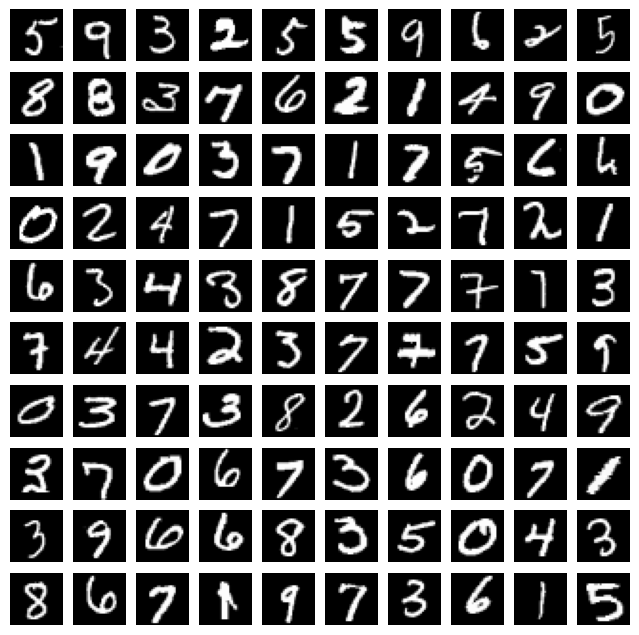

In [9]:
# Vemos las imágenes para el entrenamiento
show_images(x_train)

Como vamos a ver conceptos básicos de Keras, es mejor tener las imágenes como un vector de características, por lo que vamos a "aplanar" nuestras imágenes de train y test en una matriz de 2 dimensiones. Además, vamos a normalizar los valores entre 0 y 1, para ello dividimos entre 255, ya que los valores en escala de grises van del 0 al 255.

Y, al igual que en todos los problemas multiclase en deep learning, hay que convertir los valores a codificación **one hot** para poder trabajar con ellos. Lo vamos a dejar ya preparado con la función `to_categorical` de `keras.utils`.

In [10]:
x_train = x_train.astype('float32') # conjunto de entrenamiento los convertimos a float
x_train /= 255 # dividiendo por 255 nuestras imágenes van a estar dadas entre el rango de (0,1)
x_train = x_train.reshape(x_train.shape[0],-1) # aplanamos a una dimensión para usar una NN clásica, pasando de (54000,28,28) a (54000,784)
y_train = keras.utils.to_categorical(y_train, num_classes=10) # convierto los datos de salida en variable dummyes (OneHotEncoding), teniendo 10 posibles clases para y_train
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))
print()

x_valid = x_valid.astype('float32') # a float
x_valid /= 255 # normalizo
x_valid = x_valid.reshape(x_valid.shape[0],-1) # aplano
y_valid = keras.utils.to_categorical(y_valid, num_classes=10) # OneHotEncoding para y_valid
print("Dimensiones del conjunto de características de train aplanadas: {}".format(x_valid.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_valid.shape))
print()


x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],-1)
y_test = keras.utils.to_categorical(y_test, num_classes=10) # OneHotEncoding para y_test
print("Dimensiones del conjunto de características de test aplanadas: {}".format(x_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

(54000, 784)
Dimensiones del conjunto de características de train aplanadas: (54000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (54000, 10)

Dimensiones del conjunto de características de train aplanadas: (6000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (6000, 10)

Dimensiones del conjunto de características de test aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (10000, 10)


<a id="section2.2"></a>
# <font color="#004D7F" size=5>2.2. Grafo</font>

Existen dos formas de definir un grafo en Keras: `Sequential` y `Model`. En resumen, `Sequential` es más fácil de usar que `Model`, pero es más restrictivo en cuanto a las entradas/salidas y las conexiones entre diferentes capas. Investigar sobre ambas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Podéis consultar mejor las diferencias en la [documentación de Keras](https://keras.io/models/about-keras-models/) o en este [artículo](https://jovianlin.io/keras-models-sequential-vs-functional/).


Nosotros vamos a utilizar `Sequential`. Este objeto define un grafo lineal (no tiene niveles, mientras que en el de Model si), donde las capas se van interconectando por en el orden en el que las vamos añadiendo. Trabajar con `Sequential` es igual que utilizar una lista de python, donde con la función `add()` vamos añadiendo capas. Además, también podemos inicializar el objeto con una lista. 

Veamos un ejemplo de ambos casos definiendo una red para MNIST con dos capas ocultas `Fully connected` (`Dense` en Keras) con 32 nodos cada una, `ReLU` como función de activación y `softmax` en la salida.

In [11]:
# Creamos el modelo de NN
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # inicializo el modelo
model.add(Dense(32, input_shape=(784,), activation='relu')) # Primera capa oculta, 784 como el número de características a recibir (28x28 píxeles aplanados)
model.add(Dense(32, activation='relu')) # Segunda capa oculta
model.add(Dense(10, activation='softmax')) # Salida (10 clases)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Si os fijáis, en ambos modelos, en la primera capa se ha añadido `input_shape`. Esto hay que hacerlo obligatoriamente en la primera y sólo en la primera capa de todos los modelos, indicando el tamaño de la entrada. Este valor es 784 (28*28) que corresponde con el número de pixels de las imágenes de MNIST.

<a id="section2.3"></a>
# <font color="#004D7F" size=5>2.3. Entrenamiento</font>

El siguiente paso es definir el aprendizaje, es decir, la función de perdida (`loss`) y el optimizador. Keras define estos conceptos mediante la función `compile`. Esta función tiene como parámetros de entrada `loss` y `optimizer`, que pueden ser definidos mediante `string`, para usar una función concreta con sus valores por defecto, o un objeto que defina la función. Además, podemos añadir diferentes métricas que se calcularán durante el proceso de aprendizaje y de validación.

Vamos a ver unos ejemplos de como funciona.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i>
Podéis consultar la lista de funciones [`loss`](https://keras.io/losses/) disponibles en Keras en  y los [`optimizer`](https://keras.io/optimizers/)
</div>

In [12]:
# Ejemplo con las funciones predefinidas y con valores por defecto
model.compile(loss='categorical_crossentropy', optimizer='sgd') 
# Podemos añadir métricas (estas metricas no se van a usar para el entrenamiento)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc']) # métrica accuracy

# Para problemas de clasificación multiclase usar categorical_crossentropy y optimizador 'sgd' o 'adam', pero fijarse de probar otros en el link de arriba
# El optimizador es el gradiente que va actualizando los pesos hasta la máxima reducción de la función de pérdida

Ejemplo con la función de optimización con otra configuración.

Realmente las funciones de `loss` ya vienen predefinidas y no tienen parámetros de configuración

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
**Importante:** Ha habido una última acutalización en Keras donde para hacer _decay_ se deben utilizar ahora las clases desarrolladas por la propia librería. Por tanto, el código correcto sería el siguiente (omitir el del vídeo). Más información de los diferentes [_Decay_ en Keras](https://keras.io/api/optimizers/learning_rate_schedules/)
    

In [13]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    #staircase=True,
    decay_rate=1e-6)

In [14]:
# Podemos configurar los hiperparámetros de nuestro optimizador
from keras.optimizers import SGD
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True) # le añadimos una tasa de aprendizaje y un decay bajo (por lo tanto un momentum alto)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
# SGD sería otro tipo de gradiente descendiente

Y ya sólo nos queda realizar el entrenamiento con la función `fit` como si de un algoritmo de SciKit se tratase. Esta función tiene como parámetros de entrada la matriz de características, las clases, el número de epochs y el tamaño del batch y devuelve un objeto History con información sobre el entrenamiento, como el `loss` obtenido o las `metrics` que hayamos indicado en `compile`.

In [15]:
# Debemos realizar el ajuste del modelo (guardo en el historial el comportamiento en cada época del modelo)
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=128) 
# Entreno al modelo con los datos de entrenamiento, le añado con que validarlos y le aclaro épocas y batch_size (elementos a tomar para actualizar pesos)
# Podemos ver que nos muestra el acc y loss de la parte de entrenamiento y validación

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8388 - loss: 0.5253 - val_acc: 0.9483 - val_loss: 0.1780
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9559 - loss: 0.1471 - val_acc: 0.9567 - val_loss: 0.1480
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9681 - loss: 0.1073 - val_acc: 0.9593 - val_loss: 0.1442
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9740 - loss: 0.0893 - val_acc: 0.9612 - val_loss: 0.1375
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9764 - loss: 0.0793 - val_acc: 0.9633 - val_loss: 0.1320
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9784 - loss: 0.0733 - val_acc: 0.9640 - val_loss: 0.1286
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9791 - loss: 0.0698 - val_acc: 0.9645 - val_loss: 0.1273
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9801 - loss: 0.0678 - val_acc: 0.9647 - val_loss: 0.1270
Epoch 9/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [16]:
# Diccionario de las métricas que se estan utilizando
print(history.history.keys())

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


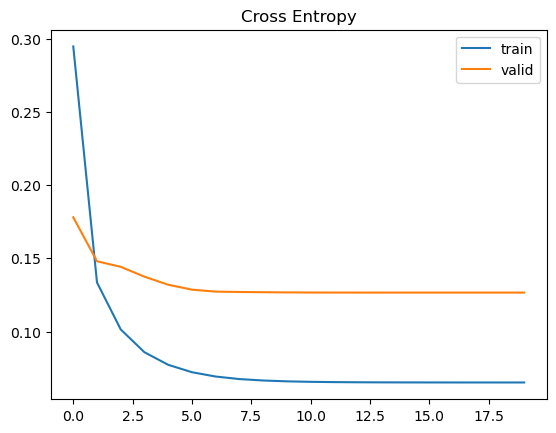

In [17]:
# Vemos la evolución de la función de pérdida a lo largo de las épocas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()
# Vemos que nuestro modelo no tiene Overffiting porque train y valid conforme aumentan las épocas, sus valores de pérdida disminuyen
# No se produce el fenómeno de que por entrenar de más a los datos el error con respecto a la validación aumenta

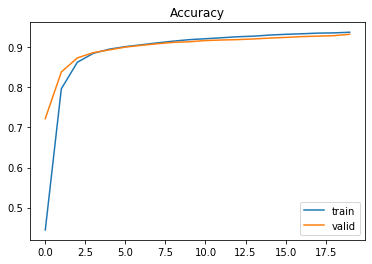

In [ ]:
# Mostramos la evolución del accuracy a través de las épocas
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()
# Vemos lo mismo que con el error, no hay Overffiting porque vemos que el acc de valid sigue aumento conforme aumentan las épocas, en vez de disminuir por el sobreajuste del modelo a los datos de entrenamiento
# Podemos decir que hemos llegado a una buena convergencia de nuestro modelo (no nos hace falta cambiar funciones usadas ni números de épocas por ahora)

<a id="section2.4"></a>
# <font color="#004D7F" size=5>2.4. Predicción y test</font>

El objeto `Sequential` además incluye funciones para obtener las predicciones de nuevos casos y de obtener automáticamente los resultados siguiendo las métricas que hayamos indicado.

Vamos a ver primero como sería el proceso de predicción, para un subconjunto de imágenes de test. Para ello contamos con varias funciones, al igual que pasaba con SciKit, que son:
* `predict`: la salida de la última capa.
* `predict_proba`: las probabilidades normalizadas de las salidas (si nuestra red ya incluye softmax al final, el resultado es el mismo que la función anterior).
* `predict_class`: la clase predicha, equivalente al argmax a las funciones anteriores.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


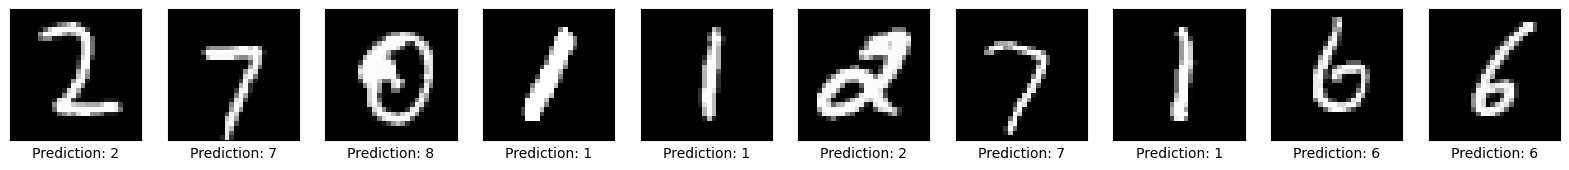

In [24]:
# En este caso nos quedamos con las clases
predictions = model.predict(x_test)
# predictions = (model.predict(x_test) > 0.5).astype("int32") # para modelos binarios 
predictions = np.argmax(predictions, axis=1) # para modelos multiclase

# Mostramos algunos digitos con las clases predichas
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(x_test), size=10)
for i in range(10): # muestro 10 imágenes aleatorias y veo las predicciones del modelo para esos casos
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(x_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

# Vemos que el modelo esta haciendo buenas predicciones sobre los datos de test

Nada mal, ahora vamos a obtener algunos resultados sobre el test. Para ello utilizamos `evaluate`, que nos devolverá los valores `loss` y las `metrics` para un conjunto de test.

In [25]:
# Evaluamos el modelo con respecto a test (vemos loss y acc)
score = model.evaluate(x_test, y_test)
print()
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))
# Vemos que el modelo nos da resultados parecidos a los vistos con respecto a valid, indicando que la exposición a nuevos datos por fuera del entrenamiento no afecta mucho a su rendimiento

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - acc: 0.9646 - loss: 0.1133

Loss: 0.10052897781133652
Accuracy: 0.9692999720573425


---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio opcional </font></h3>

Los resultados no son malos, pero se pueden mejorar. Por eso, en este primer ejercicio se pide que trateis de mejorar la tasa de acierto, modificando la red y/o el optimizador.

In [ ]:
#TODO

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Conceptos avanzados</font>

Una vez visto como hacer un grafo y entrenarlo en Keras, vamos a ver otras capas como las convolucionales, dropout, normalización, y para ello esta vez vamos a tratar un problema un poco más complejo, **VGG 102 Category Flowers**.

<a id="section3.1"></a>
# <font color="#004D7F" size=5>3.1. VGG 102 Category Flowers</font>

Este problema ya lo hemos visto en prácticas anteriores, por lo que vamos a cargar la base de datos que se generó en la práctica 3 de preprocesamiento de imágenes. Recordemos que se trata de un problema de clasificación de imágenes donde la clase es una de las 102 posibles etiquetas que representan flores que aparecen en la foto.

In [71]:
# En este dataset hay 102 posibles clases (flores etiquetadas) a predecir
import sys
import time
import urllib.request
import tarfile

# Hacemos una función para reportar el grado de progreso de la descarga
def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    if duration == 0:
        duration = 1  # Evitar la división por cero
    progress_size = int(count * block_size)
    speed = int(progress_size / (1024 * duration))
    percent = int(count * block_size * 100 / total_size) if total_size > 0 else 0
    sys.stdout.write("\r...%d%%, %d MB, %d KB/s, %d seconds passed" %
                    (percent, progress_size / (1024 * 1024), speed, duration))
    sys.stdout.flush()

# Descargamos y extraemos el dataset (no es necesario si vamos a usar iteradores)

# data_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz'
# urllib.request.urlretrieve(data_url, 'vgg102flowers.tar.gz', reporthook)
# tar = tarfile.open('vgg102flowers.tar.gz', "r:gz")
# tar.extractall()
# tar.close()

# labels_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
# urllib.request.urlretrieve(labels_url, 'vgg102flowers_targets.mat', reporthook)

    # importing required modules
    from zipfile import ZipFile
     
    # specifying the zip file name
    file_zip = "102flowers.zip"
     
    # opening the zip file in READ mode
    with ZipFile(file_zip, 'r') as zip:
        # printing all the contents of the zip file
        zip.printdir()
     
        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall()
        print('Done!')
     
    labels_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
     
    from urllib.request import urlopen
    from shutil import copyfileobj
     
    with urlopen(labels_url) as in_stream, open('vgg102flowers_targets.mat', 'wb') as out_file:
        copyfileobj(in_stream, out_file)
     
    urllib.request.urlretrieve(labels_url, 'vgg102flowers_targets.mat', reporthook)

In [72]:
from glob import glob
from scipy.io import loadmat

# Files ordenados
files = np.array(sorted(glob("jpg/*")))

# Targets
mat = loadmat('vgg102flowers_targets.mat')
labels = mat['labels'][0] - 1

# Barajamos el dataset en conjunto con las etiquetas
idx = np.random.permutation(len(files))
files = files[idx]
labels = labels[idx]

# Cargamos los nombres de las clases
# From: https://github.com/jimgoo/caffe-oxford102
names = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']

print("Loaded %d files." % len(files))
# Tenemos 8189 archivos (fotos de los 102 tipos de plantas)

Loaded 8189 files.


In [73]:
# Hacemos división para entrenamiento/validación del modelo y para luego testearlo con datos nuevos
from sklearn.model_selection import train_test_split

# Train_valid/test división (80% para entrenar, 20% para testear)
train_valid_files, test_files, train_valid_labels, test_labels = train_test_split(
    files, labels, test_size=0.2, random_state=1234, stratify=labels)
# Train/valid división (de ese entrenamiento vamos a tener un 75% para entrenar y un 25% para validar)
train_files, valid_files, train_labels, valid_labels = train_test_split(
    train_valid_files, train_valid_labels, test_size=0.25, random_state=5678, stratify=train_valid_labels)

print("Train: ", train_files.shape) # número de instancias usadas para entrenamiento
print("Valid: ", valid_files.shape) # número de instancias usadas para validar el entrenamiento
print("Test: ", test_files.shape) # número de instancias nuevas (por fuera del entrenamiento del modelo) usadas para testear el rendimiento del modelo

del train_valid_files, train_valid_labels # eliminamos las tuplas que contenian los datos de entrenamiento y validación juntos, reemplazados por train/valid

Train:  (4913,)
Valid:  (1638,)
Test:  (1638,)


Hasta aquí todo es igual que en la práctica 3 de preprocesamiento de imágenes. Ahora vamos a utilizar las funciones de **Keras** para preparar un iterador que recorra las imágenes de la carpeta y así poder entrenar nuestra red neuronal. Extisten varias opciones para realizar este iterador, así como formas de hacer data augmentation y de extender dichas opciones a las predefinidas en Keras. Se recomienda echar un vistazo a la página de [procesamiento de imágenes.](https://keras.io/preprocessing/image/)

En este caso vamos a empezar leyendo de un DataFrame de pandas con dos columnas, una con la ruta a la imagen y otra con la etiqueta correspondiente. Todo esto lo haremos a través de la clase `ImageDataGenerator`, que se divide en dos partes como veremos a continuación.

In [74]:
# Preparamos un iterador que vaya recorriendo las imágenes de la carpeta 'jpg', ya que al ser muchas y de gran tamaño no nos conviene almacenarlas en memoria
# Este iterador elegiría de a números más pequeños para ir analizando las imágenes y que las vaya metiendo en memoria de a turnos para trabajar con las capas, en este caso leemos el df con la columna de ruta a la imagen y con la etiqueta correspondiente
# Abajo definimos los 3 df 
import pandas as pd

train_frame = pd.DataFrame(np.array([train_files, train_labels]).T, columns=['files','labels']) # hacemos la transpuesta de los arrays de datos y etiquetas y les asignamos nombres a las nuevas columnas
valid_frame = pd.DataFrame(np.array([valid_files, valid_labels]).T, columns=['files','labels'])
test_frame = pd.DataFrame(np.array([test_files, test_labels]).T, columns=['files','labels'])
# Vemos que tenemos 2 columnas, una con la dirección url de la imagen y otra con la etiqueta de flor a la que pertenece (ya no lo tenemos cargado en memoria)

In [87]:
# Le hacecmos un reescalado a las imágenes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# cuando definimos ImageDataGenerator incluimos los preprocesamientos a realizar. En este caso normalizo valores de entrada
train_datagen = ImageDataGenerator(rescale=1./255) # normalizo a las imágenes para que me muestre los valores de los píxeles de 0 a 1 en vez de 0 a 255
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# y con esta indicamos como vamos a leer la información y de donde (iterador). En este caso formateamos a todas las imágenes de un tamaño 100x120 para analizar
train_iter = train_datagen.flow_from_dataframe(train_frame, 
                                               x_col='files', 
                                               y_col='labels',                # agarramos el df construido, asignamos x y, indicamos la salida del target (100x120 pxl)
                                               target_size=(100, 120),        # class_mode='categorical' aplica One-Hot Encoding al target (aplana) y selecciono el tamaño del batch para ir almacenando y analizando imagenes de a turnos 
                                               class_mode='categorical',      # como estamos en entrenamiento nos conviene que elija aleatoriamente muestras (Shuffle=True)
                                               batch_size=32, 
                                               shuffle=True)

valid_iter = valid_datagen.flow_from_dataframe(valid_frame, 
                                               x_col='files', 
                                               y_col='labels', 
                                               target_size=(100, 120), 
                                               class_mode='categorical',     # Para validación y para test no nos conviene que las elecciones de batch sean aleatoria (Shuffle=False) ya que analiza correlativamente
                                               batch_size=32, 
                                               shuffle=False)

test_iter = test_datagen.flow_from_dataframe(test_frame, 
                                             x_col='files', 
                                             y_col='labels', 
                                             target_size=(100, 120), 
                                             class_mode='categorical',
                                             batch_size=32, 
                                             shuffle=False)

Found 4913 validated image filenames belonging to 102 classes.
Found 1638 validated image filenames belonging to 102 classes.
Found 1638 validated image filenames belonging to 102 classes.


In [76]:
test_iter.image_shape # vemos las dimensiones de las imágenes
# Nuestras imágenes van a estar dadas por unas dimensiones de 100x120 pxl x3 canales de color (RGB)
# Por lo que en el paso anterior formateamos todas las imágenes a 100x120, que en principio eran de diferente tamaño

(100, 120, 3)

<a id="section3.2"></a>
# <font color="#004D7F" size=5>3.2. Red Convolucional</font>

En esta sección vamos a definir una red al estilo de AlexNet (la que normalmente se utiliza) o como la que se vio en la práctica 4. Muchas de las redes convolucionales para el tratamiento de imágenes siguen estos patrones:
* 1 o varios bloques convolucionales compuestos, que incluye:
  * 1 o varias capas convolucionales, todas con activación ReLU
  * 1 capa Max Pooling
* 1 o varias capas densas o `Fully connected` con activación ReLU
* 1 capa de salida con softmax

Siguiendo este esquema, vamos a diseñar una red con dos capas convolucionales conpuestas, una densa y la salida de nuestro problema.

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Definimos el modelo lineal
model = Sequential()

# Recordemos que en la primera capa hay que indicar el tamaño de la entrada con input_shape
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 120, 3))) # capa convolucional, 32 nauronas, tamaño de patch 5x5 y f de act 'relu'
model.add(MaxPooling2D(pool_size=(2, 2))) # capa de pooling, podemos modificar el pool_size, pero por defecto es de 2x2 y esta bien

model.add(Conv2D(64, (5, 5), activation='relu')) # otra capa convolucional con 64 neuronas
model.add(MaxPooling2D(pool_size=(2, 2))) # otra capa de pooling de 2x2

# Antes de poder pasar de la capa convolucional a la densa (Completamente conectadas), es necesario "aplanar" la salida, por eso se usa Flatten
model.add(Flatten())
model.add(Dense(1024, activation='relu')) # añadimos capa densa de 1024 neuronas con f de act 'relu'
model.add(Dropout(0.5)) # agregamos una capa dropout para prevenir el sobreajuste del modelo (el 50% de las neuronas en esa capa se apagarán aleatoriamente en cada iteración del entrenamiento)

# finalmente creamos la capa de salida, con el tamaño de las etiquetas de nuestro problema
model.add(Dense(102, activation='softmax')) # añadimos una capa de salida con f de act 'softmax' (para clasif multiclase)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Antes de continuar, vamos a ver unas funciones de Keras especialmente útiles para ver ciertos aspectos de las redes.

<a id="section3.2.1"></a>
## <font color="#004D7F" size=4>summary</font>
Esta función nos muestra una tabla con las capas que forman nuestra red, asi como su tamaño y el número de parámetros a entrenar por capa.

In [78]:
model.summary() # vemos las capas que conforman nuestra red
# Vemos las dimensiones de salida de cada capa: por ej desp de aplicar la primera convolución me resultan 32 mapas de caracteristicas de tamaño 96x116 y después del pooling se reduce a la mitad las dimensiones de la imagen sin afectar los mapas de caracteres 
# También vemos que luego del aplanado me los deja en una sola dimensión de 38016 neuronas con una capa densa que sigue reduciendo las dimensiones hasta llegar a la de salida
# Se puede apreciar ademas la cantidad de parámetros que crea cada capa, siendo las Fully-Conected las mayores responsables, además de las convolucionales
# Añadir capas densas le suma un grado de analisis de problemas más complejos a nuestro modelo

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 96, 116, 32)         │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 48, 58, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 44, 54, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 38016)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │      38,929,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 102)                 │         104,550 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,087,654 (149.11 MB)

 Trainable params: 39,087,654 (149.11 MB)

 Non-trainable params: 0 (0.00 B)

<a id="section3.2.2"></a>
## <font color="#004D7F" size=4>get_config</font>
Esta función nos devuelve la configuración de una red, en una estructura de diccionario y que se puede utilizar para inicializar otros modelos. Es una forma muy sencilla de exportar/importar la estructura de las redes.

In [79]:
model.get_config() 
# Esto sirve para exportar e importar redes convolucionales, para ver que hemos utilizado como parámetros internos de cada capa de nuestro modelo

{'name': 'sequential_3',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 100, 120, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_3'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d_6',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': No

<a id="section3.3"></a>
# <font color="#004D7F" size=5>3.3. Entrenamiento y validación</font>

En este punto vamos a entrenar la red igual que hicimos en el problema de MNIST. Como estamos trabajando con un iterador, deberemos llamar a la función `fit_generator`, que se encarga de realizar el mismo proceso que `fit` pero con un generador. Además, deberemos indicar el numero de pasos o `steps` que tiene una `epoch`. Esto es, el número total de imágenes entre el tamaño del batch.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
**Importante:** Ha habido una última acutalización en Keras donde para hacer _decay_ se deben utilizar ahora las clases desarrolladas por la propia librería. Por tanto, el código correcto sería el siguiente (omitir el del vídeo). Más información de los diferentes [_Decay_ en Keras](https://keras.io/api/optimizers/learning_rate_schedules/)
    

In [80]:
# Podemos configurar los hiperparámetros de nuestro optimizador
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    #staircase=True,
    decay_rate=1e-6)

In [88]:
# Observamos como se ajusta nuestro modelo a los datos
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True) # decay bajo con un gran momentum
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc']) # compilamos con f de pérdida

# Guardo en el historial el comportamiento del modelo en cada una de las épocas
history = model.fit(train_iter, steps_per_epoch = train_frame.shape[0]//train_iter.batch_size,  # pasamos el iterador con los datos de entrenamiento y los pasos por época (divido el total de imáganes que tengo para entrenar entre el patch establecido en train_iter,1413/32, en cada época voy a evaluar 153 imágenes)
                              epochs=10, validation_data=valid_iter,                            # pongo para validar el iterador con los datos de validación y para los pasos de validación por época hago lo mismo que para entrenamiento pero dividiendo el conjunto por lo establecido en valid_iter
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

# Vemos que a medida que vamos aumentando las épocas la perdida disminuye y la ganancia del modelo aumenta con respecto a los datos de entrenamiento, pero la perdida aumenta y la capacidad de predicción es baja con respecto a los datos de validación
# Vemos que se produce Overffiting

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 81s 512ms/step - acc: 0.0357 - loss: 4.4957 - val_acc: 0.0306 - val_loss: 4.4993
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - acc: 0.0000e+00 - loss: 4.7667 - val_acc: 0.0000e+00 - val_loss: 4.4705
Epoch 3/10


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


153/153 ━━━━━━━━━━━━━━━━━━━━ 77s 495ms/step - acc: 0.0317 - loss: 4.5050 - val_acc: 0.0306 - val_loss: 4.4991
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - acc: 0.0000e+00 - loss: 4.4293 - val_acc: 0.0000e+00 - val_loss: 4.5011
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 75s 479ms/step - acc: 0.0323 - loss: 4.5130 - val_acc: 0.0306 - val_loss: 4.4988
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - acc: 0.0000e+00 - loss: 4.4610 - val_acc: 0.0000e+00 - val_loss: 4.4863
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 73s 466ms/step - acc: 0.0273 - loss: 4.4976 - val_acc: 0.0306 - val_loss: 4.4986
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - acc: 0.0312 - loss: 4.6335 - val_acc: 0.0000e+00 - val_loss: 4.4890
Epoch 9/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 73s 464ms/step - acc: 0.0304 - loss: 4.4960 - val_acc: 0.0306 - val_loss: 4.4983
Epoch 10/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - acc: 0.0625 - loss: 4.4133 - val_acc: 0.0000e+00 - val_loss: 4.4913


In [89]:
# Vemos los resultados del modelo con respecto a los datos de validación y los de test
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - acc: 0.0319 - loss: 4.4966
loss en validación: 4.498342037200928 
accuracy en validación: 0.030637254938483238
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - acc: 0.0271 - loss: 4.4948
loss en test: 4.498787879943848 
accuracy en test: 0.030637254938483238


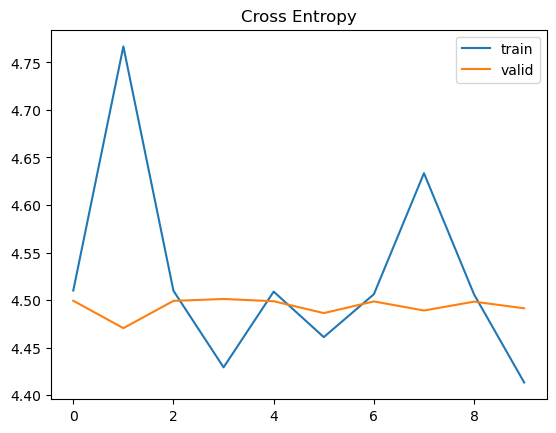

In [90]:
# Representamos gráficamente las funciones de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()
# Tengo una pérdida en entrenamiento que es muy variable (si fuera baja seguiria subsistiendo el problema), y tengo una pérdida en validación que no disminuye a medida que trasncurren las épocas e incluso aumenta (Overffiting)

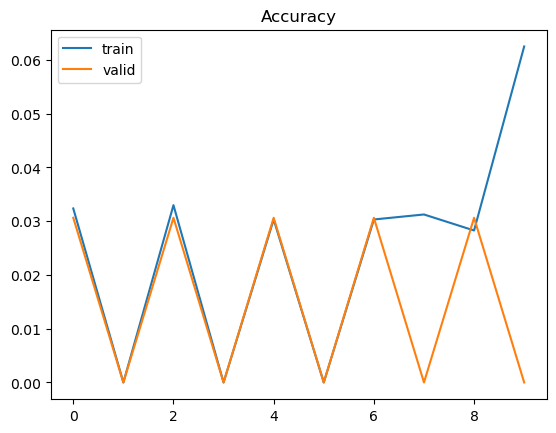

In [91]:
# Representamos gráficamente los accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()
# Vemos un accuracy con respecto a los datos de entrenamiento que aumenta conforme aumentan las épocas, pero no disminuye con respecto a los datos de validación, identificando aquí también un sobreajuste
# Una explicación para el poco accuracy conseguido podría ser la poca cantidad de datos de la que disponemos

Hemos alcanzado una tasa de acierto del 40%, tanto en validación como en test. No es un mal resultado para este problema ya que hay pocas imágenes. Sin embargo nos hemos encontrado con un grave problema de sobreajuste. Tenemos un problema y un modelo complejos, pero no tenemos datos suficientes para entrenar nuestra red. Trataremos de solucionar esto con el data augmentation.

Antes de continuar, si nos fijamos, tenemos parámetros correspondientes al tamaño de las capas convolucionales y densas, así como de max pooling, número de capas total, configuración del dropout y del optimizador. 

Conforme vamos aumentando la complejidad, hay más hiperparámetros que configurar. Cuanto mejores resultados busquemos, más tiempo tendremos que dedicar a configurar la red y entender los resultados que se obtienen de ella para nuestro problema. 

<a id="section3.4"></a>
# <font color="#004D7F" size=5>3.4. Data Augmentation</font>

En este apartado vamos a volver a trabajar los conceptos de data augmentation. Aunque Keras incluye muchas funciones para el diseño de grafos, en el caso del preprocesamiento de imágenes es más limitado. Como punto a favor, es que estas funciones son muy fáciles de usar y como se ha comentado antes, Keras tiene muchas herramientas para aumentar su funcionalidad, como son las funciones [Backend](https://keras.io/backend/) o el poder integrar funciones directamente de TensorFlow.

Vamos a continuar con el dataset de flores y para ello vamos a definir un nuevo `ImageDataGenerator` pero solo para el train. Esta clase la hemos visto más arriba, pero vamos a definirla un poco más en detalle, ya que se divide principalmente en dos partes:
* Primero, en el constructor definimos las operaciones o modificaciones que vamos a realizar a los datos.
* Segundo, con las funciones `flow` generamos un iterador que se va a encargar de leer los datos. Por eso los parámetros de entrada de las funciones `flow` indican donde se encuentran las imágenes, el formato de estas y el tamaño de salida. También indicamos aquí el tamaño del batch del iterador.

Con esto el iterador obtenido primero cargará el batch de datos según lo indicado en los parámetros de las funicones `flow` y luego aplicará las funciones definidas en el constructor de [`ImageDataGenerator`](https://keras.io/preprocessing/image/). Estas funciones consisten en data augmentation estocástico, es decir, cada operación que se ha indicado se aplica de forma aleatoria a las diferentes datos, en este caso imágenes, de los batches.

In [92]:
# Como tenemos pocos datos, vamos a aplicar un data augmentation en nuestros datos de entrenamiento (para validación y test no tiene sentido aplicar)
# definimos transformación en los datos (con esto también creamos nuevas imágenes)
train_datagen_augmented = ImageDataGenerator(rescale=1./255, horizontal_flip = True, vertical_flip = True, rotation_range = 10) # normalizamos los datos, le damos una vuelta a la imagen en vertical, en horizontal y las rotamos un 10%
# generamos el nuevo iterador para leer datos (seguimos reescalando el formato a 100x120x3)
train_iter_augmented = train_datagen_augmented.flow_from_dataframe(train_frame, 
                                                                   x_col='files', 
                                                                   y_col='labels', 
                                                                   target_size=(100, 120), 
                                                                   class_mode='categorical',
                                                                   batch_size=32, 
                                                                   shuffle=True)

Found 4913 validated image filenames belonging to 102 classes.


In [93]:
# Volvemos a crear el modelo
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# definimos el modelo lineal
model = Sequential()

# el primer bloque convolucional completo, formado de dos capas convolucionales con activación relu, 
# un max pooling y un dropout.

# recordemos que en la primera capa hay que indicar el tamaño de la entrada
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(100, 120, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Antes de poder pasar de la capa convolucional a la densa, es necesario "aplanar" la salida, por eso se usa Flatten
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# finalmente creamos la capa de salida, con el tamaño de las etiquetas de nuestro problema
model.add(Dense(102, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
**Importante:** Ha habido una última acutalización en Keras donde para hacer _decay_ se deben utilizar ahora las clases desarrolladas por la propia librería. Por tanto, el código correcto sería el siguiente (omitir el del vídeo). Más información de los diferentes [_Decay_ en Keras](https://keras.io/api/optimizers/learning_rate_schedules/)
    

In [94]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    #staircase=True,
    decay_rate=1e-6)

In [95]:
# Volvemos a realizar el ajuste a nuestro modelo
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

history = model.fit(train_iter_augmented,
                              steps_per_epoch = train_frame.shape[0]//train_iter_augmented.batch_size,
                              epochs=10,
                              validation_data=valid_iter, 
                              validation_steps= valid_frame.shape[0]//valid_iter.batch_size)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 86s 540ms/step - acc: 0.0263 - loss: 4.5740 - val_acc: 0.0306 - val_loss: 4.5087
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - acc: 0.0938 - loss: 4.5991 - val_acc: 0.0000e+00 - val_loss: 4.4785
Epoch 3/10


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


153/153 ━━━━━━━━━━━━━━━━━━━━ 83s 528ms/step - acc: 0.0351 - loss: 4.5186 - val_acc: 0.0319 - val_loss: 4.5015
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - acc: 0.0000e+00 - loss: 4.5730 - val_acc: 0.0000e+00 - val_loss: 4.5487
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 80s 510ms/step - acc: 0.0281 - loss: 4.5084 - val_acc: 0.0319 - val_loss: 4.5023
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - acc: 0.0625 - loss: 4.4651 - val_acc: 0.0000e+00 - val_loss: 4.5226
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 75s 482ms/step - acc: 0.0289 - loss: 4.5075 - val_acc: 0.0319 - val_loss: 4.4997
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - acc: 0.0625 - loss: 4.4616 - val_acc: 0.0000e+00 - val_loss: 4.5047
Epoch 9/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 85s 544ms/step - acc: 0.0328 - loss: 4.4981 - val_acc: 0.0319 - val_loss: 4.4996
Epoch 10/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - acc: 0.0312 - loss: 4.5408 - val_acc: 0.0000e+00 - val_loss: 4.4939


In [96]:
score = model.evaluate(valid_iter, steps= valid_frame.shape[0]//valid_iter.batch_size)
print("loss en validación: {} \naccuracy en validación: {}".format(score[0],score[1]))
score = model.evaluate(test_iter, steps= test_frame.shape[0]//test_iter.batch_size)
print("loss en test: {} \naccuracy en test: {}".format(score[0],score[1]))

51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - acc: 0.0332 - loss: 4.4969
loss en validación: 4.499537467956543 
accuracy en validación: 0.03186274692416191
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - acc: 0.0320 - loss: 4.4945
loss en test: 4.49992036819458 
accuracy en test: 0.03125


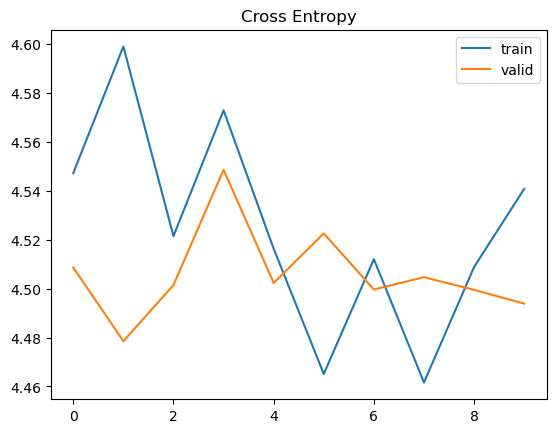

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()
# Vemos ahora que la función de pérdida con respecto a los datos de validación (ignorando las irregularidades) va diminuyendo a lo largo de las épocas

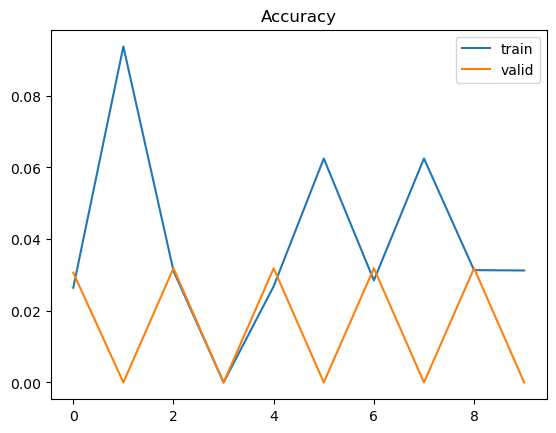

In [98]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()
# Tambien vemos que el accuracy con respecto a los datos de validación (ignorando las irregularidades) se mantiene constante. Eliminando el sobreajuste
# El Overffiting lo podemos ver cuando las métricas con respecto a los datos de train y valid no convergen al mismo sitio
# Tanto el dropout como el data augmentation sirven para disminuir el Overffiting

Hemos visto claramente la utilidad del data augmentation y lo fácil que es aplicar dichas funciones con Keras. Con esto ya hemos repasado los puntos más importantes de Keras para poder empezar a trabajar con nuestras bases de datos, diseñar y entrenar nuestras redes y evaluar su comportamiento.

---

<h3><font color="#004D7F" size=5> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio opcional </font></h3>

Para terminar, al igual que antes, se deja un bloque para que el alumno pruebe diferentes estructuras tratando de mejorar los resultados obtenidos por la red, ya que actualmente solo hay 3 capas (2 convolucionales y 1 densa). Se recomienda también probar diferentes optimizadores y utilizar data augmentation.

In [ ]:
# TODO

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>